# Imports

In [1]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler, DPMSolverMultistepScheduler, AutoencoderKL
import torch
import matplotlib.pyplot as plt

/Users/shanewinterhalter/Projects/ai_learning/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Constants

In [2]:
model_id = "stabilityai/stable-diffusion-2-1"
inf_steps = 20

In [3]:
# Set GPU device
if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'
print(device)

mps


# Functions

In [4]:
def show_img(img):
    imgplot = plt.imshow(img)
    plt.axis('off')
    imgplot.axes.get_xaxis().set_visible(False)
    imgplot.axes.get_yaxis().set_visible(False)

# Create model

In [5]:
if device != 'mps':
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
    vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse", torch_dtype=torch.float16).to(device)
else:
    pipe = StableDiffusionPipeline.from_pretrained(model_id)
    vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse").to(device)
pipe = pipe.to(device)
pipe.enable_attention_slicing()
# Scheduler type - Euler has better quality, DPM is faster
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)
#pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.vae = vae

Fetching 13 files: 100%|██████████| 13/13 [00:00<00:00, 173098.26it/s]
/Users/shanewinterhalter/Projects/ai_learning/venv/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [6]:
pipe.scheduler.compatibles

[diffusers.schedulers.scheduling_euler_discrete.EulerDiscreteScheduler,
 diffusers.schedulers.scheduling_dpmsolver_multistep.DPMSolverMultistepScheduler,
 diffusers.schedulers.scheduling_pndm.PNDMScheduler,
 diffusers.schedulers.scheduling_deis_multistep.DEISMultistepScheduler,
 diffusers.schedulers.scheduling_euler_ancestral_discrete.EulerAncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_heun_discrete.HeunDiscreteScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_ancestral_discrete.KDPM2AncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_ddpm.DDPMScheduler,
 diffusers.schedulers.scheduling_ddim.DDIMScheduler,
 diffusers.schedulers.scheduling_lms_discrete.LMSDiscreteScheduler,
 diffusers.schedulers.scheduling_dpmsolver_singlestep.DPMSolverSinglestepScheduler,
 diffusers.schedulers.scheduling_unipc_multistep.UniPCMultistepScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_discrete.KDPM2DiscreteScheduler]

# Generate output

In [7]:
prompt = "portrait photo of a old warrior chief"
prompt += ", tribal panther make up, blue on red, serious eyes, in front of forest"                                                                                                                                                   
prompt += " 50mm portrait photography, hard rim lighting photography--beta --ar 2:3  --beta --upbeta"
if device == "cuda":
    generator = torch.Generator(device).manual_seed(60)   
    image = pipe(prompt, generator=generator, num_inference_steps=inf_steps).images[0]
elif device == "mps":
    image = pipe(prompt, num_inference_steps=inf_steps).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]/Users/shanewinterhalter/Projects/ai_learning/venv/lib/python3.10/site-packages/diffusers/schedulers/scheduling_euler_discrete.py:168: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  step_index = (self.timesteps == timestep).nonzero().item()
100%|██████████| 20/20 [01:14<00:00,  3.75s/it]


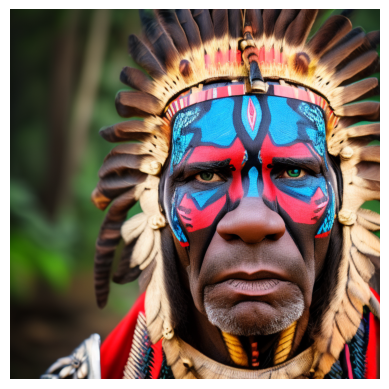

In [8]:
show_img(image)

# Unconditional Image Generation

100%|██████████| 20/20 [01:20<00:00,  4.01s/it]


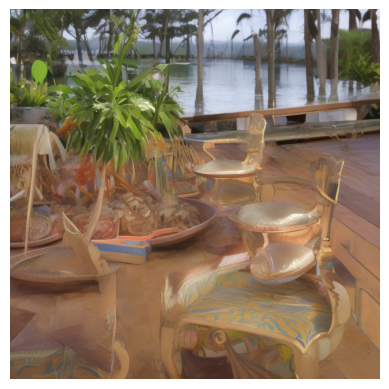

In [9]:
image = pipe("", num_inference_steps=20).images[0]
show_img(image)